<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.1
# *Data Wrangling and Munging with Pandas*

## Part 1: Wrangling Data

The term "data wrangling" is analogous to capturing wild horses and getting them into a fenced area; the horses are data and the fencing is your computer. The more common data wrangling tasks include:

- reading flat files
- reading Excel files
- downloading from web pages
  - csv
  - html
  - json

In [2]:
import numpy as np
import pandas as pd

*It is good practice to display the library version numbers for future reference:*

In [3]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.26.0
Pandas:  2.1.1


### CSV Files

Below are three attempts to load the file "bikeshare.csv" into a DataFrame named `bikes`. Why are they wrong?

In [4]:
# wrong: read table's seperator is tab, not comma, the header exists
bikes = pd.read_table('../../DATA/bikeshare.csv', header = None)
print(bikes.head())
print()

# wrong: read table's seperator is tab, not comma, the header exists, but it is 0.
bikes = pd.read_table('../../DATA/bikeshare.csv', header = 1)
print(bikes.head())
print()

# wrong: read table's seperator is tab, not comma.
bikes = pd.read_table('../../DATA/bikeshare.csv', header = 0)
print(bikes.head())
print(bikes.shape)

                                                   0
0  instant,dteday,season,yr,mnth,hr,holiday,weekd...
1  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...
2  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...
3  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...
4  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...

  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
0  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...     
1  3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0...     
2  4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,...     
3  5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,...     
4  6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,...     

  instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0  1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,...                                                                   
1  2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0...                                        

ANSWER:

Load the file "bikeshare.csv" into a DataFrame named `bikes`, and confirm that it was loaded properly:

In [5]:
#ANSWER:
bikes = pd.read_csv('../../DATA/bikeshare.csv')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Note that we could have used `read.csv()` above. When is `read_table()` necessary?

?:
ANSWER: When `sep` is not the comma character, or we need fine control that `read.csv()` does not provide.

Flat files can be full of surprises. Here are some issues to watch out for:

- separator character is something other than the comma
  - ";", "|", and tab are popular
- newline character is something other than what the O/S expects
  - Tip: Don't hard-code the character codes for carriage returns, linefeeds, etc. Use Python's built-in representation instead (e.g. Python translates "\n" to the newline character and "\t" to the tab character on any O/S).
- truncated lines
  - if there are empty fields at the end of a line it is possible that their separators will be missing, resulting in a "jagged" file
- embedded commas or quotes
  - a free-text field containing embedded commas may split into separate fields on input
  - a free-text field containing embedded quotes may not parse correctly
- unescaped characters
  - the "\" character indicates a control code to Python, which will break the I/O
    - e.g. the substring "\u0123" will be interpreted as Unicode(0123) -- which may not be what the file creator intended
  - these may need to be fixed by loading whole strings and then parsing into a new data frame
  
Tip: Most issues can be dealt with by correctly specifying the parameters of the function you use to load the file. Read the doco before reading the data!

### Reading Excel Files

In [6]:
from pandas import ExcelFile  # Nb. Need to install xlrd from conda (it does not automatically install with pandas)

In [7]:
df = pd.read_excel('../../DATA/Iris.xls', sheet_name = 'Data')
df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa
...,...,...,...,...,...,...
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica


It is usually better to load data correctly than to meddle with the source file or load it 'warts and all' and then try to parse it in code. The Pandas functions for reading files have parameters that provide the control we need. For example, we could make multiple calls to `read_excel()`, using combinations of the `header`, `usecols`, `skiprows`, `nrows`, and `skipfooter` parameters to load one table at a time from a spreadsheet with multiple tables.

Load the above file without the unwanted columns:

In [8]:
#ANSWER Use usecol
df = pd.read_excel('../../DATA/Iris.xls', sheet_name = 'Data', usecols=[1,2,3])
df


,Petal_width,Petal_length,Sepal_width
0,0.2,1.4,3.5
1,0.2,1.4,3.0
2,0.2,1.3,3.2
3,0.2,1.5,3.1
4,0.2,1.4,3.6
...,...,...,...
145,2.3,5.2,3.0
146,1.9,5.0,2.5
147,2.0,5.2,3.0
148,2.3,5.4,3.4


### Importing Data Directly from the Web

We usually want to store a local copy of a data file that we download from the Web, but when data retention is not a priority it is convenient to download the data directly into our running Python environment.

#### Importing Text Files from the Web

The web is the 'wild west' of data formats. However, we can usually expect good behaviour from files that are automatically generated by a service, such as the earthquake report:

In [9]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_hour.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-09T05:27:26.499Z,40.435400,-84.106700,6.622,3.00,mb_lg,14,53,0.303,0.21,...,2023-12-09T05:47:13.452Z,"5 km W of Jackson Center, Ohio",earthquake,0.74,4.068,0.069,55,reviewed,us,us
1,2023-12-09T05:04:55.966Z,-45.793700,-75.947300,14.530,4.50,mb,27,150,1.830,0.78,...,2023-12-09T05:20:55.040Z,"246 km W of Puerto Chacabuco, Chile",earthquake,9.10,5.084,0.156,13,reviewed,us,us
2,2023-12-09T04:55:35.360Z,19.349333,-155.306503,1.690,2.45,ml,44,49,NaN,0.24,...,2023-12-09T05:01:07.050Z,"12 km SW of Volcano, Hawaii",earthquake,0.28,0.430,0.240,16,automatic,hv,hv
3,2023-12-09T04:49:45.719Z,-45.760000,-75.738000,16.157,5.10,mb,36,141,1.681,0.71,...,2023-12-09T05:08:50.040Z,"230 km W of Puerto Chacabuco, Chile",earthquake,4.92,4.910,0.111,26,reviewed,us,us


#### Importing HTML Files from the Web

Working with unstructured HTML files relies heavily on library functions. This one, however, is well-structured:

In [10]:
url = 'https://www.ccra.com/airport-codes/'
df = pd.read_html(url)
df

[                City      Country Code
 0            Aalborg      Denmark  AAL
 1           Aalesund       Norway  AES
 2             Aarhus      Denmark  AAR
 3     Abbotsford, BC       Canada  YXX
 4     Abbotsford, BC       Canada  YXX
 ...              ...          ...  ...
 1574        Zanzibar     Tanzania  ZNZ
 1575        Zaragoza        Spain  ZAZ
 1576       Zhengzhou        China  CGO
 1577        Zhoushan        China  HSN
 1578          Zurich  Switzerland  ZRH
 
 [1579 rows x 3 columns]]

In [11]:
df[0]

# For this dataset however, the data ends up in the list index 0.
# For this, it also reads all of the next page. 

,City,Country,Code
0,Aalborg,Denmark,AAL
1,Aalesund,Norway,AES
2,Aarhus,Denmark,AAR
3,"Abbotsford, BC",Canada,YXX
4,"Abbotsford, BC",Canada,YXX
...,...,...,...
1574,Zanzibar,Tanzania,ZNZ
1575,Zaragoza,Spain,ZAZ
1576,Zhengzhou,China,CGO
1577,Zhoushan,China,HSN


In [12]:
# Retrieve the dataframe out from the list
a = df[0]
type(a)
a.head()

,City,Country,Code
0,Aalborg,Denmark,AAL
1,Aalesund,Norway,AES
2,Aarhus,Denmark,AAR
3,"Abbotsford, BC",Canada,YXX
4,"Abbotsford, BC",Canada,YXX


#### Importing XML Files from the Web

XML files are semi-structured, but you're at the mercy of the file creator. If every record has the same format it will be much easier, but practical applications often require a lot of custom code. Here are a few examples: https://pandas.pydata.org/docs/user_guide/io.html#io-read-xml

#### Importing JSON Files from the Web

Like XML, JSON files are semi-structured and may require work to capture the schema into a dataframe. Here is a simple example:

In [13]:
url = 'https://microsoftedge.github.io/Demos/json-dummy-data/64KB.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient = 'columns')
df.head()

,name,language,id,bio,version
0,Adeel Solangi,Sindhi,V59OF92YF627HFY0,Donec lobortis eleifend condimentum. Cras dict...,6.10
1,Afzal Ghaffar,Sindhi,ENTOCR13RSCLZ6KU,"Aliquam sollicitudin ante ligula, eget malesua...",1.88
2,Aamir Solangi,Sindhi,IAKPO3R4761JDRVG,Vestibulum pharetra libero et velit gravida eu...,7.27
3,Abla Dilmurat,Uyghur,5ZVOEPMJUI4MB4EN,Donec lobortis eleifend condimentum. Morbi ac ...,2.53
4,Adil Eli,Uyghur,6VTI8X6LL0MMPJCC,"Vivamus id faucibus velit, id posuere leo. Mor...",6.49


## Part 2: Data Munging

Data munging is manipulating data to get it into a form that we can start running analyses on (which usually means getting the data into a DataFrame). Before we get to this stage, we may need to remove headers or footers, transpose columns to rows, split wide data tables into long ones, and so on. (Nb. Excel files can be particularly troublesome, because users can format their data in mixed, complex shapes.) Essentially, we need to follow Hadley Wickham's guidelines for tidy datasets (http://vita.had.co.nz/papers/tidy-data.html):

The end goal of the cleaning data process:

- each variable should be in one column
- each observation should comprise one row
- each type of observational unit should form one table
- include key columns for linking multiple tables
- the top row contains (sensible) variable names
- in general, save data as one file per table


### Dataset Morphology

Once we have our dataset in a DataFrame (or Series, if our data is only 1-dimensional), we can start examining its size and content.

Information about bikeshares data: 
https://towardsdatascience.com/predicting-no-of-bike-share-users-machine-learning-data-visualization-project-using-r-71bc1b9a7495

The dataset is a csv file with information from 17,379 hours over 731 days with 16 features (information categories) for each hour. The features are:

1. Record index
2. Date
3. Season (1:spring, 2:summer, 3:fall, 4:winter)
4. Year (0: 2011, 1:2012)
5. Month (1 to 12)
6. Hour (0 to 23)
7. Holiday : whether that day is holiday or not
8. Weekday : day of the week
9. Working-day : if day is neither weekend nor holiday , value is 1. Otherwise 0
10. Weather situation :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. Normalized temperature in Celsius. Values are divided to 41 (max)
12. Normalized feeling temperature in Celsius. Values are divided to 50 (max)
13. Normalized humidity. The values are divided to 100 (max)
14. Normalized wind speed. The values are divided to 67 (max)
15. Count of casual users
16. Count of registered users
17. Count of total rental bikes including both casual and registered


How many rows and columns are in `bikes`?

In [14]:
#ANSWER
bikes.shape


(17379, 17)

What are the column names in `bikes`?

In [15]:
#ANSWER
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

What are the data types of these columns?

In [16]:
#ANSWER
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

What is the (row) index for this DataFrame?

In [17]:
#ANSWER
bikes.index

RangeIndex(start=0, stop=17379, step=1)

https://www.dataquest.io/blog/python-json-tutorial/

## Slicing and Dicing

It is often preferable to refer to DataFrame columns by name, but there is more than one way to do this.
Do `bikes['season']` and `bikes[['season']]` give the same object? Demonstrate:

In [18]:
#ANSWER
type(bikes['season'])

pandas.core.series.Series

In [19]:
type(bikes[['season']])

pandas.core.frame.DataFrame

Answer : bikes['season'] will give a pandas series. bike[['season']] will give a pandas dataframe. 

How would we use object notation to show the first 4 rows of `atemp`?

In [20]:
#ANSWER
bikes["atemp"][:4,]


0    0.2879
1    0.2727
2    0.2727
3    0.2879
Name: atemp, dtype: float64

Algorithms that loop over multiple columns often access DataFrame columns by index. However, none of the following work (try them out by uncommenting / removing the "#E: " ):

In [21]:
#bikes[[0]]
#bikes[0]
#bikes[0,0]
#bikes[[0,0]]

What is the correct way to access the 1st row of the DataFrame by its index?

In [22]:
#ANSWER
bikes[:1]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [23]:
bikes.iloc[0]

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                6
workingday             0
weathersit             1
temp                0.24
atemp             0.2879
hum                 0.81
windspeed            0.0
casual                 3
registered            13
cnt                   16
Name: 0, dtype: object

In [24]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


What is the correct way to access the 2nd column of the DataFrame by its index?

In [25]:
#ANSWER
# Second column is dteday
bikes.iloc[:,1]

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

## Handling Missing Values

What is the Pandas `isnull` function for?

?ANSWER: Detect missing values for an array-like object. It returns boolean. 

We can apply `isnull` to the `bikes` DataFrame to show the result for every element:

In [26]:
bikes.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


However, we usually start at a higher level. How many nulls are in `bikes` altogether?

In [27]:
#ANSWER
bikes.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### isnull WILL NOT pick up "N/A" since it is a string.

If this result were nonzero we would next want to find out which columns contained nulls. How can this be done in one line of code?

In [28]:
#ANSWER


What is the Numpy object `nan` used for? (Write a descriptive answer.)

?
ANSWER: NaN - "Not a number" value

Write (and verify) a function that performs scalar division with built-in handling of the edge case (i.e. return a value instead of just trapping the error):

In [29]:
#ANSWER
def divide(dividend, divisor):
    if divisor == 0:
        quotient = np.nan
    else:
        quotient = dividend/divisor
    return (quotient)

print(divide(1,2))

0.5


Apply the Pandas `isna` function to the following data objects:

In [30]:
x = 2.3
y = np.nan
print(x, y)

2.3 nan


In [31]:
#ANSWER
print(pd.isna(x), pd.isna(y))

False True


In [32]:
# Missing values in na
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
print(array)

[[ 1. nan  3.]
 [ 4.  5. nan]]


In [33]:
#ANSWER
print(pd.isna(array))

[[False  True False]
 [False False  True]]


In [34]:
y = np.nan
pd.isna(y) #is y a mising value? 


True

Sometimes instead of putting missing value, 0, it will put in 99 which means unknown data. So, we need to watch out for that one as well. 

Usually when you work, there is a dictionary which gives us a rough idea about what data is expected. The use of '99' will also be in the dictionary. 

In [35]:
# Setting the missing value for 99.
test = pd.read_csv('../../DATA/bikeshare.csv', na_values=[99])

How is the pandas I/O parameter `na_values` used?

? ANSWER: Use to add a possible value that represents missing values. 

## Data Profiling

### Counts

When there are categorical variables in a dataset we will want to know how many possible values there are in each column. (Nb. If the dataset is a sample of a larger one, our sample may not capture all possible values of every categorical.)

How many (different) seasons are in `bikes`?

In [36]:
#ANSWER
bikes["season"].unique()

array([1, 2, 3, 4])

In [37]:
bikes["season"].value_counts(normalize=True) # Turn to proportion

season
3    0.258703
2    0.253697
1    0.244088
4    0.243512
Name: proportion, dtype: float64

### Ranges

Print the range of the `instant`, `dteday`, and `windspeed` columns:

In [38]:
#ANSWER
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [39]:
bikes.describe().T

# Holiday is likely to be boolean.
# this only do the numeric data.

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Note on the data:
* Season is numerical category, containing 1-4. 
* Holiday is a boolean where 1 is holiday, and 0 is not.
* Working-day: 1 = working day, and 0 = weekend or holiday.

Compute and print the overall minimum and maximum of the numeric data columns:

In [40]:
bikes.describe().T["min"]

instant       1.00
season        1.00
yr            0.00
mnth          1.00
hr            0.00
holiday       0.00
weekday       0.00
workingday    0.00
weathersit    1.00
temp          0.02
atemp         0.00
hum           0.00
windspeed     0.00
casual        0.00
registered    0.00
cnt           1.00
Name: min, dtype: float64

In [41]:
bikes.describe().T["max"]

instant       17379.0000
season            4.0000
yr                1.0000
mnth             12.0000
hr               23.0000
holiday           1.0000
weekday           6.0000
workingday        1.0000
weathersit        4.0000
temp              1.0000
atemp             1.0000
hum               1.0000
windspeed         0.8507
casual          367.0000
registered      886.0000
cnt             977.0000
Name: max, dtype: float64

In [42]:
bikes_min, bikes_max = (bikes.min(), bikes.max())
bikes_min, bikes_max

(instant                1
 dteday        2011-01-01
 season                 1
 yr                     0
 mnth                   1
 hr                     0
 holiday                0
 weekday                0
 workingday             0
 weathersit             1
 temp                0.02
 atemp                0.0
 hum                  0.0
 windspeed            0.0
 casual                 0
 registered             0
 cnt                    1
 dtype: object,
 instant            17379
 dteday        2012-12-31
 season                 4
 yr                     1
 mnth                  12
 hr                    23
 holiday                1
 weekday                6
 workingday             1
 weathersit             4
 temp                 1.0
 atemp                1.0
 hum                  1.0
 windspeed         0.8507
 casual               367
 registered           886
 cnt                  977
 dtype: object)

### Quantiles

Pandas makes computing quantiles easy. This is how to get the median of a Series:

In [43]:
bikes['atemp'].quantile(0.5)

0.4848

Of course, the `quantiles` method can take a tuple as its argument. Compute the 10th, 25th, 50th, 75th, and 90th percentiles in one line of code:

In [44]:
#ANSWER
bikes['atemp'].quantile((0.10, 0.25,0.50,0.75,0.90) )

0.10    0.2424
0.25    0.3333
0.50    0.4848
0.75    0.6212
0.90    0.6970
Name: atemp, dtype: float64

### Cuts

Sometimes we want to split the sample not by the quantiles of the distribution but by the range of the data. Let's take a closer look at `atemp`:

It is when you need to create a new column by grouping the numeric data into category. For example, grouping the temperature together into mild, extreme, severe instead of just the number. This is one of "Feature Engineering", creating a new feature. 

# What is you have your own logic to bin? 
0-0.1 = cold
0.1-0.5 = mild
0.5 - 0.6 = warm
0.6-0.8 = hot
0.8-1 = extreme

In [45]:
bikes['atemp_label'] = pd.cut(bikes['atemp'], bins=[0,0.1,0.5,0.6,0.8,1], labels=['cold', 'mild','warm','hot','extreme'])

In [46]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_label
9497,9498,2012-02-05,1,1,2,15,0,0,0,2,0.30,0.2879,0.56,0.2537,55,217,272,mild
14246,14247,2012-08-21,3,1,8,19,0,2,1,3,0.62,0.5909,0.73,0.1045,56,420,476,warm
5664,5665,2011-08-29,3,0,8,11,0,1,1,1,0.66,0.6212,0.47,0.1642,38,100,138,hot
2075,2076,2011-04-01,2,0,4,8,0,5,1,2,0.26,0.2424,0.87,0.2537,8,198,206,mild
5972,5973,2011-09-11,3,0,9,9,0,0,0,1,0.66,0.6212,0.74,0.0000,59,168,227,hot


In [47]:
# Clean the table before the next exercise. 

bikes.drop('atemp_label', axis=1, inplace=True)

Suppose we decide to sort these values into 4 bins of equal width, but we want to apply the resulting groups to the entire DataFrame. Basically, we need to add a row label that indicates which bin each sample belongs in. Let's call this label "atemp_level", and use the `cut` method to populate it:

What is `atemp_level`?

In [48]:
#ANSWER
bikes["atemp_level"], n = pd.cut(bikes['atemp'], bins = 4, retbins=True)
print(n)

[-0.001  0.25   0.5    0.75   1.   ]


Here is a random sample of `atemp_level`:

In [49]:
bikes["atemp_level"].sample(5)

14500       (0.5, 0.75]
5239        (0.5, 0.75]
13490       (0.5, 0.75]
1194     (-0.001, 0.25]
12184       (0.5, 0.75]
Name: atemp_level, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

In [50]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_level
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,"(0.25, 0.5]"
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,"(0.25, 0.5]"
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,"(0.25, 0.5]"
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,"(0.25, 0.5]"
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,"(0.25, 0.5]"


So, by default, `cut` produces labels that indicate the bin boundaries for each element in the series it was applied to. Usually, we will specify labels that are appropriate to the discretisation we are applying:

In [51]:
bikes["atemp_level"] = pd.cut(bikes['atemp'], bins = 4, labels = ["cool", "mild", "warm", "hot"])
bikes["atemp_level"].sample(5)

14094    warm
13738    warm
6267     mild
8020     mild
9973     mild
Name: atemp_level, dtype: category
Categories (4, object): ['cool' < 'mild' < 'warm' < 'hot']

In [52]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_level
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,mild
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,mild
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,mild
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,mild
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,mild


Incorporate the new `atemp_level` column into the `bikes` DataFrame and use it to count the number of "mild" `atemp` entries in `season` 2:

In [53]:
#ANSWER
len(bikes[(bikes["atemp_level"] == 'mild') & (bikes["season"] == 2)])

1829

*Nb. The `atemp_level` variable we created is what the R language calls a "factor". Pandas has introduced a new data type called "category" that is similar to R's factors.*

In [54]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   dteday       17379 non-null  object  
 2   season       17379 non-null  int64   
 3   yr           17379 non-null  int64   
 4   mnth         17379 non-null  int64   
 5   hr           17379 non-null  int64   
 6   holiday      17379 non-null  int64   
 7   weekday      17379 non-null  int64   
 8   workingday   17379 non-null  int64   
 9   weathersit   17379 non-null  int64   
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  cnt          17379 non-null  int64   
 17  atemp_level  17379 non-null  category
dtypes: category(1), float64(4)

In [55]:
# Correlation
# Drop the categorical variables before compute correlation. 
new_df = bikes.drop(['dteday','atemp_level'], axis=1)

In [56]:
new_df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
new_df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


<Axes: >

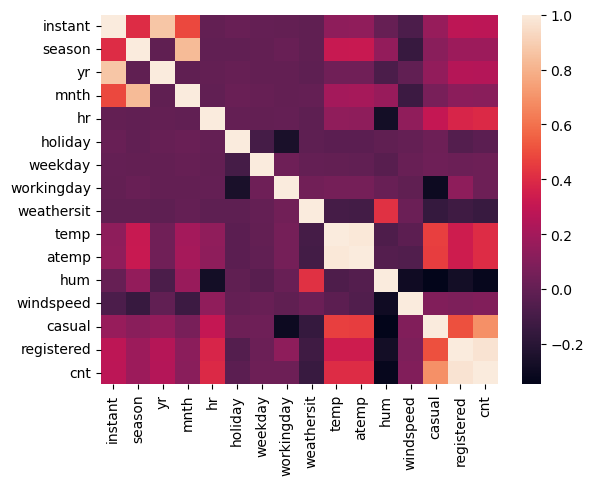

In [58]:
import seaborn as sns
sns.heatmap(new_df.corr())

In [59]:
new_df.corr()['weathersit'].sort_values()

casual       -0.152628
cnt          -0.142426
registered   -0.120966
atemp        -0.105563
temp         -0.102640
hr           -0.020203
yr           -0.019157
holiday      -0.017036
season       -0.014524
instant      -0.014198
weekday       0.003311
mnth          0.005400
windspeed     0.026226
workingday    0.044672
hum           0.418130
weathersit    1.000000
Name: weathersit, dtype: float64

# Synthetic Data

Sometimes we may want to generate test data, or we may need to initialise a series, matrix, or data frame for input to an algorithm. Numpy has several methods we can use for this.

Execute the following, then check the shape and content of each variable:

In [60]:
# Creating arrays with initial values
a = np.zeros((3))
b = np.ones((1,3))
c = np.random.randint(1,10,(2,3,4))   # randint(low, high, size)
d = np.arange(4)
e = np.array( [[1,2,3,4], [5,6,7,8]] )

In [61]:
print("a =", a)
print("b =", b)
print("c = \n", c)
print("d =",d)
print("e = \n", e)

a = [0. 0. 0.]
b = [[1. 1. 1.]]
c = 
 [[[3 1 6 7]
  [4 1 6 7]
  [2 2 3 5]]

 [[2 8 4 3]
  [6 5 7 3]
  [3 4 2 7]]]
d = [0 1 2 3]
e = 
 [[1 2 3 4]
 [5 6 7 8]]


## Load Data

Load rock.csv and clean the dataset.

In [62]:
# ANSWER
rock = pd.read_csv('../../DATA/rock.csv')
rock.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


## Context of the dataset
Source: https://github.com/fivethirtyeight/data/blob/master/classic-rock/readme.md

Each line represents a play of a song on a radio station.

* The first element, RAW_SONG, is the song text scraped from the radio station
* The second element, Song Clean, is the song's title. It's been made so that all versions of the RAW_SONG — be they (live) or spelled differently point to the same text in this field. So even if we scraped "{Don't Fear} The Reaper" or "(Don't Fear) The Reaper" or merely "The Reaper" by Blue Oyster Cult, the text in Song Clean is always "(Don't Fear) The Reaper"
* The third element, RAW_ARTIST, is the artist text scraped from the radio station
* The fourth element, ARTIST CLEAN, is a unified version of Raw Artist. So even if we scraped "Blue Öyster Cult" or "Blue Oyster Cult" or "Blue ?yster Cult", this field would always read as "Blue Oyster Cult".
* The fifth element is that station callsign of the song play
* The sixth element is time the song was pulled. Python measures time as seconds since January 1, 1970.
* The seventh element is a unique ID assigned to each play, formed by the callsign of the station that played it and a four digit number, where 0001 is the last song played on the station in our set and the highest number is the first song we pulled, if you want to order them.
* The eight element combines Song Clean and ARTIST CLEAN. It can be used for connecting this data set to the dataset of unique songs.
* The ninth element is a zero or one used to find if this is the first mention of a given song, it's pretty pointless.

### classic-rock-song-list:

Each line represents one song in the set

* Song Clean :  is the name of the song
* ARTIST CLEAN : is the name of the artist
* Release Year : is the release year, according to SongFacts. If there isn't a listed year, I couldn't find an entry for the song on SongFacts
* COMBINED : is the combined song and artist and can be used to connect this dataset to classic-rock-raw-data
* First?:  is always 1
* Year? : is 1 if there was a found year and 0 if no year was found
* PlayCount : is the number of plays of the song across all stations.
* F*G : is the number of plays of the song across all stations, if a year was found.



## Check Column Names

Check column names and clean.
Removing the weird symbols and spaces.

In [63]:
rock.columns

Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')

In [64]:
# ANSWER Two ways of doing it, using the function or just do one line thing.
# Make it lower case
# Replace space with underscore
# Remove the weird symbols

def clean_column_names(column_names):
    clean_column_names=[]
    for col in rock.columns:
        col = col.lower().replace(' ','_')
        col = col.lower().replace('?','')
        col = col.lower().replace('*','')
        clean_column_names.append(col)
    
    return clean_column_names

In [65]:
rock.columns = clean_column_names(rock.columns)
rock.columns

Index(['song_clean', 'artist_clean', 'release_year', 'combined', 'first',
       'year', 'playcount', 'fg'],
      dtype='object')

In [66]:
# One line cleaning

rock.columns = rock.columns.str.replace(' ','_').str.replace('?','').str.replace('*','').str.lower().str.strip()

In [67]:
rock.dtypes

song_clean      object
artist_clean    object
release_year    object
combined        object
first            int64
year             int64
playcount        int64
fg               int64
dtype: object

In [68]:
#Turning release year to numeric.
# The issue is that release_year has non numeric data 'SONGFACTS.COM'. I need to replace that first.

rock[rock["release_year"] == 'SONGFACTS.COM']

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
1504,Bullfrog Blues,Rory Gallagher,SONGFACTS.COM,Bullfrog Blues by Rory Gallagher,1,1,1,1


In [69]:
#Let's mark the 'SONGFACTS.COM' to 0. 


## Replace Null Values With 0

Check 'release_year' column whether this column has any null values or not. Replace null values with 0.

In [70]:

rock.loc[rock["release_year"] == 'SONGFACTS.COM', 'release_year'] = 0

# Release year also have na. Need to fill that first. 
rock[rock['release_year'].isna()]
rock['release_year'] = rock['release_year'].fillna(0)
rock['release_year'].isna().sum()


0

In [71]:
rock["release_year"] = rock["release_year"].astype({'release_year': int})
rock.dtypes

song_clean      object
artist_clean    object
release_year     int64
combined        object
first            int64
year             int64
playcount        int64
fg               int64
dtype: object

In [72]:
rock["release_year"].unique()

array([1982,    0, 1981, 1980, 1975, 2000, 2002, 1992, 1985, 1993, 1976,
       1995, 1979, 1984, 1977, 1990, 1986, 1974, 2014, 1987, 1973, 2001,
       1989, 1997, 1971, 1972, 1994, 1970, 1966, 1965, 1983, 1955, 1978,
       1969, 1999, 1968, 1988, 1962, 2007, 1967, 1958, 1071, 1996, 1991,
       2005, 2011, 2004, 2012, 2003, 1998, 2008, 1964, 2013, 2006, 1963,
       1961])

## Check Datatypes of Dataset

Check datatypes of the dataset. Is there any column which should be int instead of object? Fix the column.

In [73]:
# ANSWER
rock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_clean    2230 non-null   object
 1   artist_clean  2230 non-null   object
 2   release_year  2230 non-null   int64 
 3   combined      2230 non-null   object
 4   first         2230 non-null   int64 
 5   year          2230 non-null   int64 
 6   playcount     2230 non-null   int64 
 7   fg            2230 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 139.5+ KB


## Check Min, Max of Each Column

Is there any illogical value in any column? How can we fix that?

In [74]:
rock.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,2230.0,1465.331390,867.196161,0.0,0.0,1973.0,1981.0,2014.0
first,2230.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
year,2230.0,0.741256,0.438043,0.0,0.0,1.0,1.0,1.0
playcount,2230.0,16.872646,25.302972,0.0,1.0,4.0,21.0,142.0
fg,2230.0,15.048430,25.288366,0.0,0.0,3.0,18.0,142.0


In [75]:
rock.head()

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


* Based on the context above, first is always 1.

Need to fix 
* Release year should not have the minimum of 0. 

In [76]:
# ANSWER
min_release_year = rock[rock['release_year'] > 1071]['release_year'].min()
max_release_year = rock[rock['release_year'] != 0]['release_year'].max()
print("Min and max of release years : %1d and %2d " % (min_release_year, max_release_year))

Min and max of release years : 1955 and 2014 


## Write Some Functions

### Write a function that will take a row of a DataFrame and print out the song, artist, and whether or not the release date is < 1970

In [77]:
rock[rock["release_year"] < 1970]

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
10,"Baby, Please Don't Go",AC/DC,0,"Baby, Please Don't Go by AC/DC",1,0,1,0
13,CAN'T STOP ROCK'N'ROLL,AC/DC,0,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0
16,Girls Got Rhythm,AC/DC,0,Girls Got Rhythm by AC/DC,1,0,24,0
24,Let's Get It Up,AC/DC,0,Let's Get It Up by AC/DC,1,0,4,0
...,...,...,...,...,...,...,...,...
2216,"I'm Bad, I'm Nationwide",ZZ Top,0,"I'm Bad, I'm Nationwide by ZZ Top",1,0,10,0
2218,Just Got Paid,ZZ Top,0,Just Got Paid by ZZ Top,1,0,2,0
2221,My Head's In Mississippi,ZZ Top,0,My Head's In Mississippi by ZZ Top,1,0,1,0
2222,Party On The Patio,ZZ Top,0,Party On The Patio by ZZ Top,1,0,14,0


In [78]:
# ANSWER
# take row
# get out the name of the song, artist and whether it is release before 1970.
def is_it_before_1970(row):
    if row['release_year'] == 0:
        release = str('No release year data')
    elif row['release_year'] < 1970:
        release = str('Before 1970')
    else:
        release = str('After 1970')
    print("Song name:", row['song_clean'])
    print("By:", row['artist_clean'])
    print("Release date:", str(release))

is_it_before_1970(rock.iloc[2225])



Song name: She Loves My Automobile
By: ZZ Top
Release date: No release year data


### Write a function that converts a column in a DataFrame to a numeric type and otherwise replaces entries with np.nan

In [79]:
rock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song_clean    2230 non-null   object
 1   artist_clean  2230 non-null   object
 2   release_year  2230 non-null   int64 
 3   combined      2230 non-null   object
 4   first         2230 non-null   int64 
 5   year          2230 non-null   int64 
 6   playcount     2230 non-null   int64 
 7   fg            2230 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 139.5+ KB


In [80]:
rock.head()

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [149]:
# ANSWER
rock["try"] = rock["artist_clean"]
rock["try_2"] = rock["release_year"]

def convert(col):
    try:
        col = col.apply(pd.to_numeric)
    except:
        col = np.NaN
        
    return col

In [150]:
# Test 1 on String column
rock["try"] = convert(rock["try"])
rock["try"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: try, dtype: float64

In [151]:
# Test 2 on Numeric column
rock["try_2"] = convert(rock["try_2"])
rock["try_2"]

0       1982
1          0
2       1981
3       1980
4       1975
        ... 
2225       0
2226    1981
2227    1975
2228    1983
2229    1973
Name: try_2, Length: 2230, dtype: int64

### Apply this last function to your dataset

In [154]:
# clean data
rock = rock.drop(['try','try_2'], axis=1)

# ANSWER
for col in rock:
    rock[col] = convert(rock[col])

### 'Describe' the new DataFrame

In [155]:
# ANSWER
rock.describe()

,song_clean,artist_clean,release_year,combined,first,year,playcount,fg
count,0.0,0.0,2230.000000,0.0,2230.0,2230.000000,2230.000000,2230.000000
mean,NaN,NaN,1465.331390,NaN,1.0,0.741256,16.872646,15.048430
std,NaN,NaN,867.196161,NaN,0.0,0.438043,25.302972,25.288366
min,NaN,NaN,0.000000,NaN,1.0,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,1.0,0.000000,1.000000,0.000000
50%,NaN,NaN,1973.000000,NaN,1.0,1.000000,4.000000,3.000000
75%,NaN,NaN,1981.000000,NaN,1.0,1.000000,21.000000,18.000000
max,NaN,NaN,2014.000000,NaN,1.0,1.000000,142.000000,142.000000


In [156]:
rock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_clean    0 non-null      float64
 1   artist_clean  0 non-null      float64
 2   release_year  2230 non-null   int64  
 3   combined      0 non-null      float64
 4   first         2230 non-null   int64  
 5   year          2230 non-null   int64  
 6   playcount     2230 non-null   int64  
 7   fg            2230 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 139.5 KB


>




---



---



> > > > > > > > > © 2023 Institute of Data


---



---





In [2]:
import numpy as np

(0.02 - 0.01)/(0.025/np.sqrt(50))

2.8284271247461903